# 1/ Adversarial training of linear models versus weight decay

In [1]:
from Adversarial_vs_weight_decay.utils import extract_from_mnist, visualize_data
from Adversarial_vs_weight_decay.train import prep_data,create_model,training_loop,eval_test,eval_train, plot_losses,visualize_weights_and_signs
from Adversarial_vs_weight_decay.adv_attack import adv_attack,create_adv_test

## 1.1 Logistic regression

### Data Extraction

In [2]:
filtered_data = extract_from_mnist() # to extract the 3s and 7s from the MNIST dataset

Filtered dataset shape: (14434, 785)
Labels: 0        3
1        3
2        3
3        7
4        3
        ..
14429    3
14430    7
14431    3
14432    7
14433    3
Name: target, Length: 14434, dtype: int64


### Data preparation and model creation

In [3]:
X_train_tensor,y_train_tensor,X_val,y_val,X_test_tensor,y_test_tensor,num_classes= prep_data(filtered_data)
# to prepare the data for the training

Unique classes in target labels: 2


In [4]:
model,criterion, optimizer =create_model(X_train_tensor,num_classes,lr = 0.005)
# to create the linear model and get the criterion and optimizer


### Training Loop and performance 

In [5]:
training_loss ,val_losses,model_trained = training_loop(optimizer, model, criterion, X_train_tensor, y_train_tensor,X_val,y_val,num_epoch=120,batch_size=64)
# to train the model

Epoch [1/120], Training Loss: 0.0405, Validation Loss: 0.0731
Epoch [2/120], Training Loss: 0.0297, Validation Loss: 0.0600
Epoch [3/120], Training Loss: 0.0692, Validation Loss: 0.0530
Epoch [4/120], Training Loss: 0.1599, Validation Loss: 0.0501
Epoch [5/120], Training Loss: 0.0318, Validation Loss: 0.0484
Epoch [6/120], Training Loss: 0.0138, Validation Loss: 0.0441
Epoch [7/120], Training Loss: 0.0696, Validation Loss: 0.0423
Epoch [8/120], Training Loss: 0.0230, Validation Loss: 0.0413
Epoch [9/120], Training Loss: 0.0118, Validation Loss: 0.0400
Epoch [10/120], Training Loss: 0.0638, Validation Loss: 0.0410
Epoch [11/120], Training Loss: 0.0157, Validation Loss: 0.0385
Epoch [12/120], Training Loss: 0.0207, Validation Loss: 0.0393
Epoch [13/120], Training Loss: 0.0074, Validation Loss: 0.0382
Epoch [14/120], Training Loss: 0.0066, Validation Loss: 0.0368
Epoch [15/120], Training Loss: 0.0121, Validation Loss: 0.0361
Epoch [16/120], Training Loss: 0.0103, Validation Loss: 0.0353
E

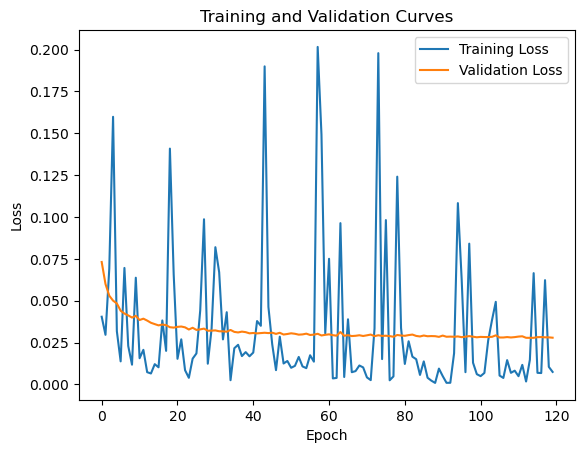

In [6]:
plot_losses(training_loss,val_losses) # to plot the training loss

In [7]:
eval_train(X_train_tensor,y_train_tensor,model_trained) # to evaluate the model on the training set

Training Accuracy: 99.23%


### Weight Visualisation

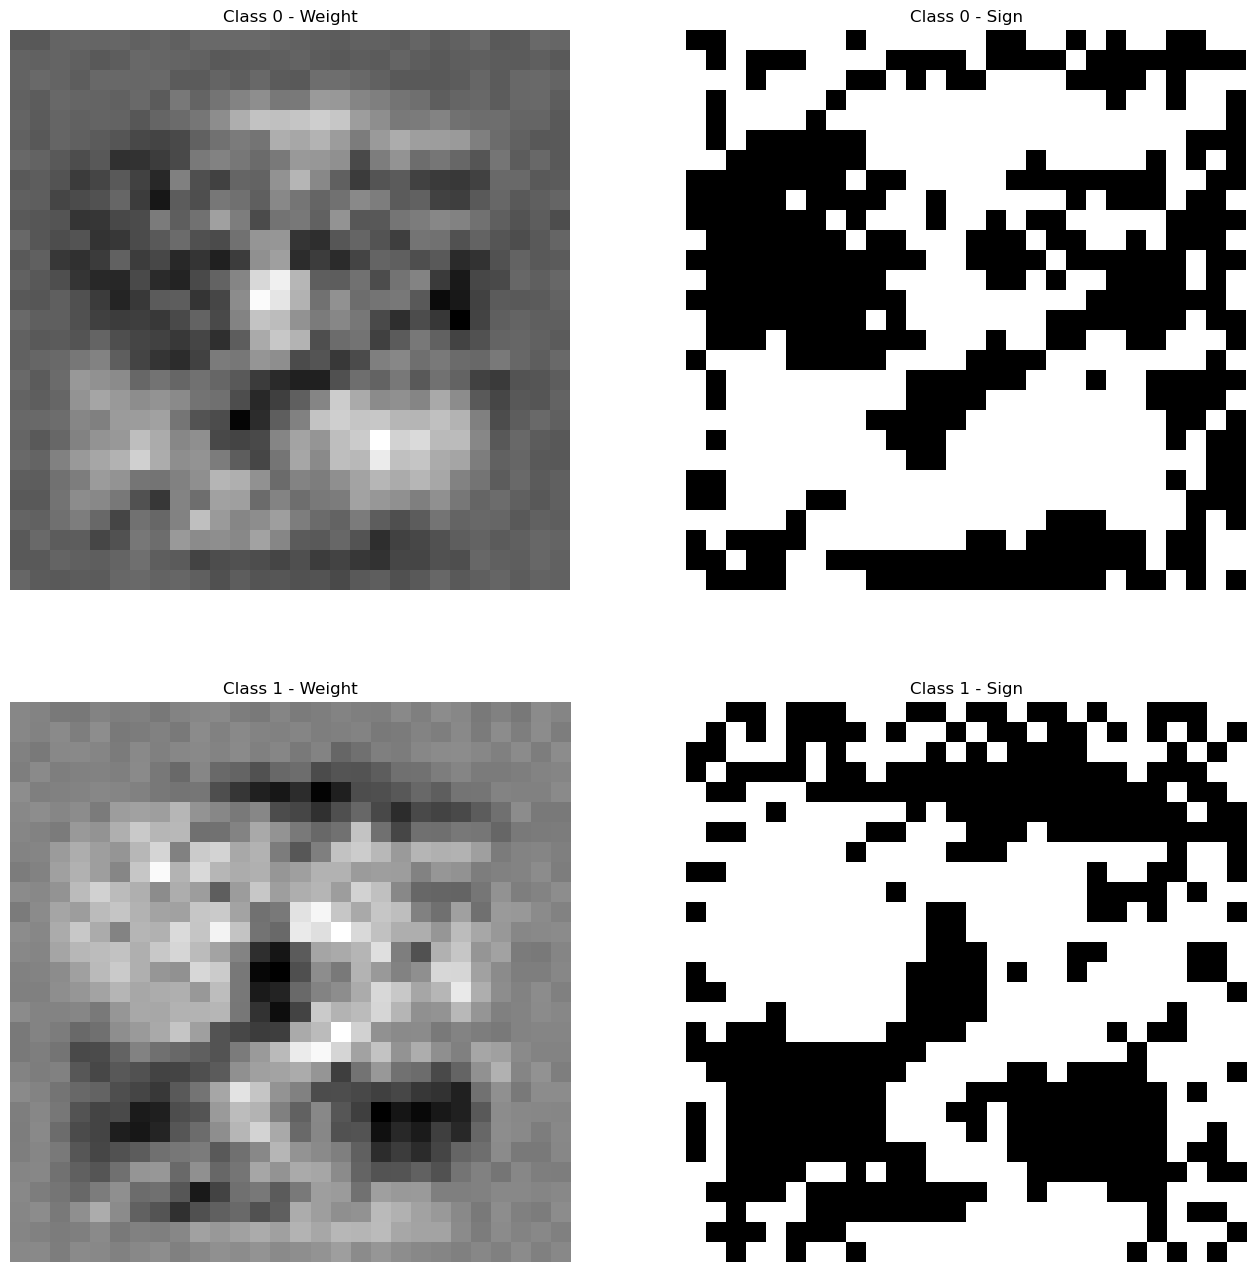

In [8]:

visualize_weights_and_signs(model_trained) # to visualize the weights and signs of the model

## 1.2 Logistic regression Vs Adversarial

### Test set for original images

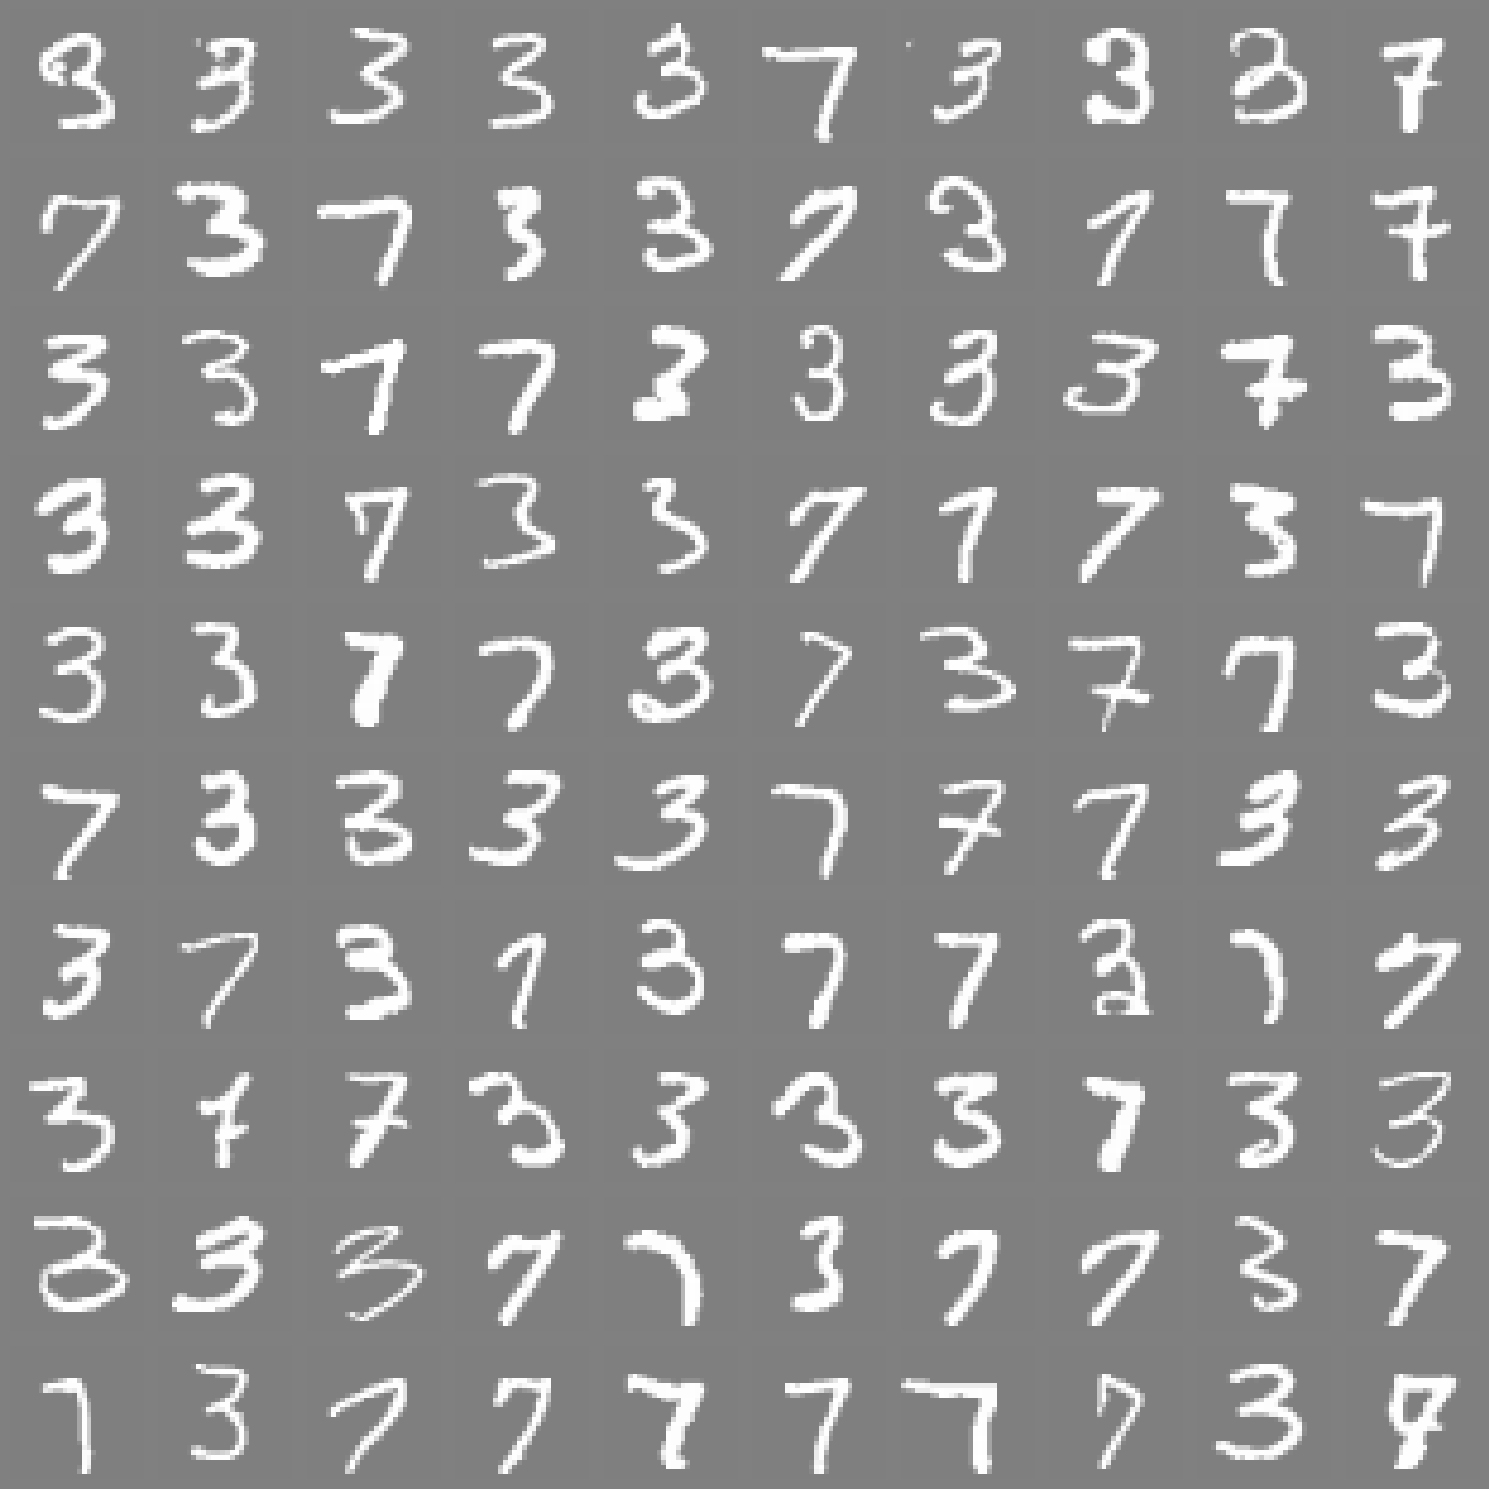

In [9]:
num_rows = 10
num_cols = 10
X_test_tensor2 = X_test_tensor.detach().numpy()
visualize_data(num_rows,num_cols,X_test_tensor2) # to visualize the test data

### Evaluation of the model on the unaltered test set

In [10]:
eval_test(X_test_tensor,y_test_tensor,model_trained) # to evaluate the model on the test set

Accuracy: 98.41%
Mean Confidence for All Examples: 0.9876
Mean Confidence for Incorrect Predictions: 0.8441


### Creation of the adversarial test set

In [11]:
eps = 0.25
X_test_tensor_adv = create_adv_test(model_trained,X_test_tensor,y_test_tensor,eps,criterion) # to create the adversarial test set

/home/spi-2019/Téléchargements/Tpworkspace/MLA_proj/Adversarial_vs_weight_decay/adv_attack.py:36: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  alt_im_norm =torch.tensor(alt_im, dtype=torch.float32)


### Visualization of the altered test set 

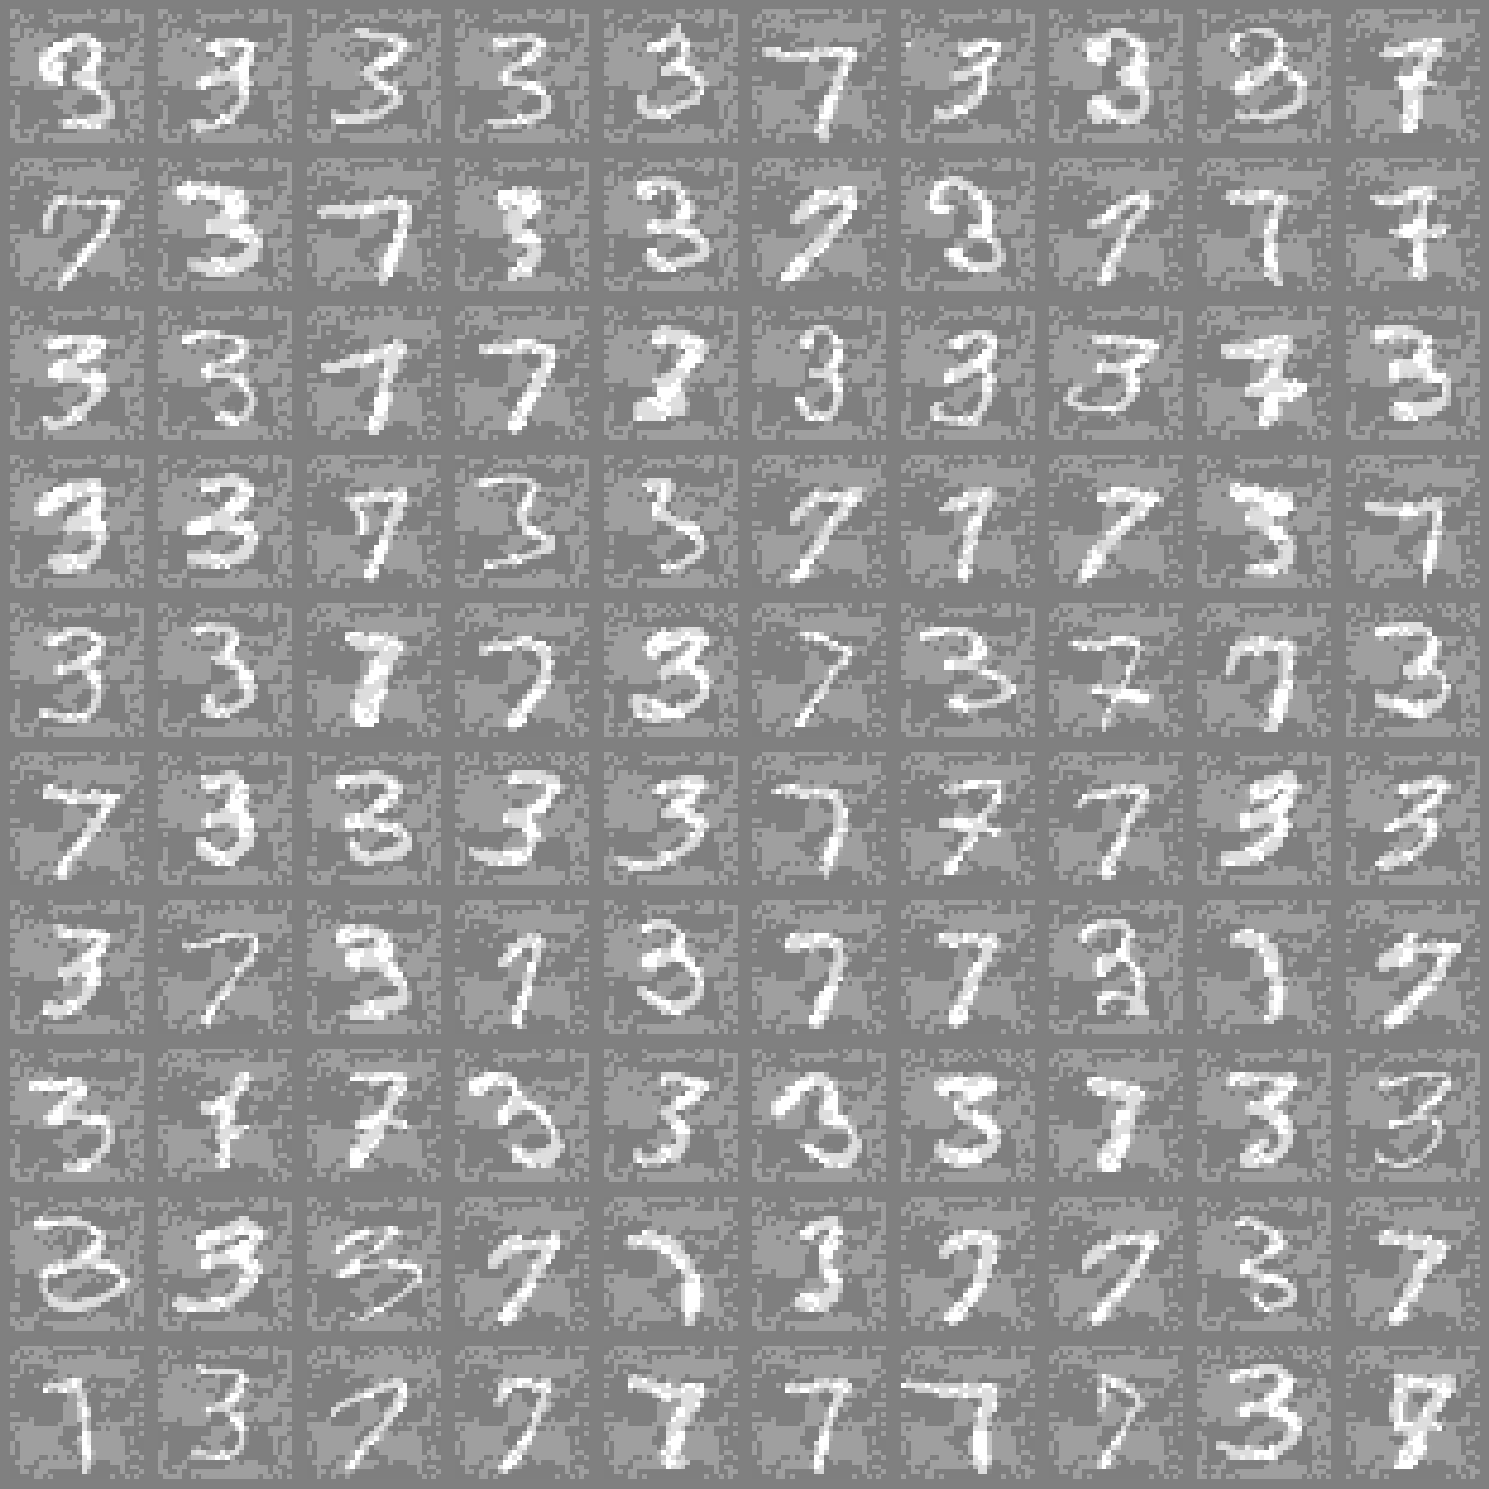

In [12]:
X_test_tensor_adv2 = X_test_tensor_adv.detach().numpy()
visualize_data(num_rows,num_cols,X_test_tensor_adv2) # to visualize the adversarial test set

### Evaluation of the model on the altered test set 

In [13]:
eval_test(X_test_tensor_adv,y_test_tensor,model_trained) # to evaluate the model on the adversarial test set

Accuracy: 0.14%
Mean Confidence for All Examples: 0.9970
Mean Confidence for Incorrect Predictions: 0.9970


# 2/ Adversarial learning in deep neural networks

In [21]:
import deep_neural.methodes as methodes
from torch.utils.data import DataLoader
from torchvision import datasets
import torch.nn as nn
import torch
from deep_neural.adv_attack import create_adv_test

## 2.1 Préparation des données

In [22]:
#on créé une transform normale et une transoform avec bruit
transform = methodes.transform_tensor(noise=False)
transform_noise = methodes.transform_tensor(noise=True)


training_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=transform
)

test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=transform
)

training_data_noised = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=transform_noise
)

batch_size = 64
training_dataloader = DataLoader(training_data, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=batch_size, shuffle=True)
training_dataloader_noised = DataLoader(training_data_noised, batch_size=batch_size, shuffle=True)


## 2.2 Définition du modèle et entrainement

In [ ]:
#je définis le deep neural network maxout avec 240 unités par couche
DNN_240 = methodes.define_model(model=240)

#on réalise dans un premier temps un entrainement normal sans attaque
DNN_240_normal_training=methodes.train_loop(training_dataloader, DNN_240, epsilon=0.1, alpha=0.5, adv_loss=False,)

#on réalise ensuite un entrainement avec attaque
DNN_240_adv_training=methodes.train_loop(training_dataloader, DNN_240, epsilon=0.1, alpha=0.5, adv_loss=True,)

#enfin on réalise un entrainement sur une base d'entraînement bruitée
DNN_240_noised_training=methodes.train_loop(training_dataloader_noised, DNN_240, epsilon=0.1, alpha=0.5, adv_loss=True)

## 2.3 Création d'images adversariales et test

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#on récupère les images et les labels de la base de test
x_test = torch.cat([images for images, labels in test_dataloader]).to(device) #images de la base test
y_test = torch.cat([labels for images, labels in test_dataloader]).to(device) #labels de la base test

eps = 0.1
loss_func = nn.CrossEntropyLoss()

#création des images adverses pour le réseau  à 240 unites et une normale loss
altered_test_240U = create_adv_test(DNN_240_normal_training, x_test, y_test, eps, loss_func)

#création des images adverses pour le réseau  à 240 unites et une loss adversariale
altered_test_240U_adv = create_adv_test(DNN_240_adv_training, x_test, y_test, eps, loss_func, adv_loss=True)

#création des images adverses pour le réseau  à 240 unites et une loss adversariale sur une base d'entrainement bruitée
altered_test_240U_noised = create_adv_test(DNN_240_noised_training, x_test, y_test, eps, loss_func, adv_loss=True)

# 3/ Essais sur RBF

In [24]:
from RBF.utils import extract_from_mnist, visualize_data
from RBF.train import prep_data,create_model,training_loop,eval_test,eval_train, plot_losses,visualize_weights_and_signs
from RBF.adv_attack import adv_attack,create_adv_test
from RBF.RBF_architecture import ShallowRBF, RbfNet2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from matplotlib.colors import LinearSegmentedColormap
from sklearn.preprocessing import LabelEncoder
from torch.autograd import Variable

## 3.1 RBF network

### Data Extraction


In [25]:
data = extract_from_mnist()

Filtered dataset shape: (20000, 785)
Labels: 0        8
1        4
2        8
3        7
4        7
        ..
19995    8
19996    3
19997    1
19998    7
19999    6
Name: target, Length: 20000, dtype: int64



### Data preparation and model creation


In [26]:
X_train_tensor,y_train_tensor,X_test_tensor,y_test_tensor,num_classes = prep_data(data)

Unique classes in target labels: 10


In [27]:
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, 64, shuffle=True)

In [28]:
# Hyperparameters
num_epochs = 200
learning_rate = 0.001
momentum = 0.9
Batch_size = 128
num_classes = 10
input_size = 784

In [29]:
batch_images,batch_labels= next(iter(train_loader))

centers = batch_images

input_size = X_train_tensor.shape[1]
model = RbfNet2(centers, num_class=10)
criterion = nn.CrossEntropyLoss()
sgd =  optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum, nesterov=True)
adam = optim.Adam(model.parameters(), lr=learning_rate)
optimizer = sgd
 

### Training Loop and performance


In [28]:
training_loss ,model_trained = training_loop(optimizer, model, criterion, X_train_tensor, y_train_tensor,num_epochs=num_epochs,batch_size=Batch_size)
# to train the model

Epoch [1/200], Loss: 0.1635
Epoch [2/200], Loss: 0.1162
Epoch [3/200], Loss: 0.1630
Epoch [4/200], Loss: 0.1713
Epoch [5/200], Loss: 0.0435
Epoch [6/200], Loss: 0.0806
Epoch [7/200], Loss: 0.0440
Epoch [8/200], Loss: 0.0911
Epoch [9/200], Loss: 0.0354
Epoch [10/200], Loss: 0.0689
Epoch [11/200], Loss: 0.1430
Epoch [12/200], Loss: 0.2854
Epoch [13/200], Loss: 0.1464
Epoch [14/200], Loss: 0.0074
Epoch [15/200], Loss: 0.0382
Epoch [16/200], Loss: 0.0248
Epoch [17/200], Loss: 0.0725
Epoch [18/200], Loss: 0.1400
Epoch [19/200], Loss: 0.3205
Epoch [20/200], Loss: 0.2164
Epoch [21/200], Loss: 0.1569
Epoch [22/200], Loss: 0.0625
Epoch [23/200], Loss: 0.0254
Epoch [24/200], Loss: 0.0421
Epoch [25/200], Loss: 0.1386
Epoch [26/200], Loss: 0.2050
Epoch [27/200], Loss: 0.0161
Epoch [28/200], Loss: 0.0621
Epoch [29/200], Loss: 0.0941
Epoch [30/200], Loss: 0.0568
Epoch [31/200], Loss: 0.0477
Epoch [32/200], Loss: 0.0372
Epoch [33/200], Loss: 0.1393
Epoch [34/200], Loss: 0.1230
Epoch [35/200], Loss: 0

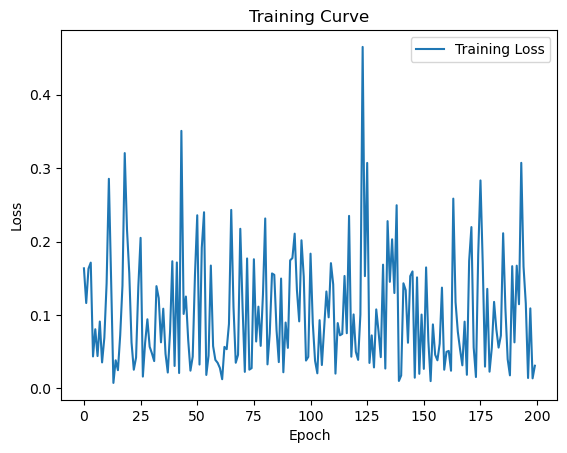

In [29]:
plot_losses(training_loss) # to plot the training loss

In [30]:
eval_train(X_train_tensor,y_train_tensor,model_trained) # to evaluate the model on the training set

Training Accuracy: 96.25%


## 3.2 RBF Vs Adversarial

### Test set for original images

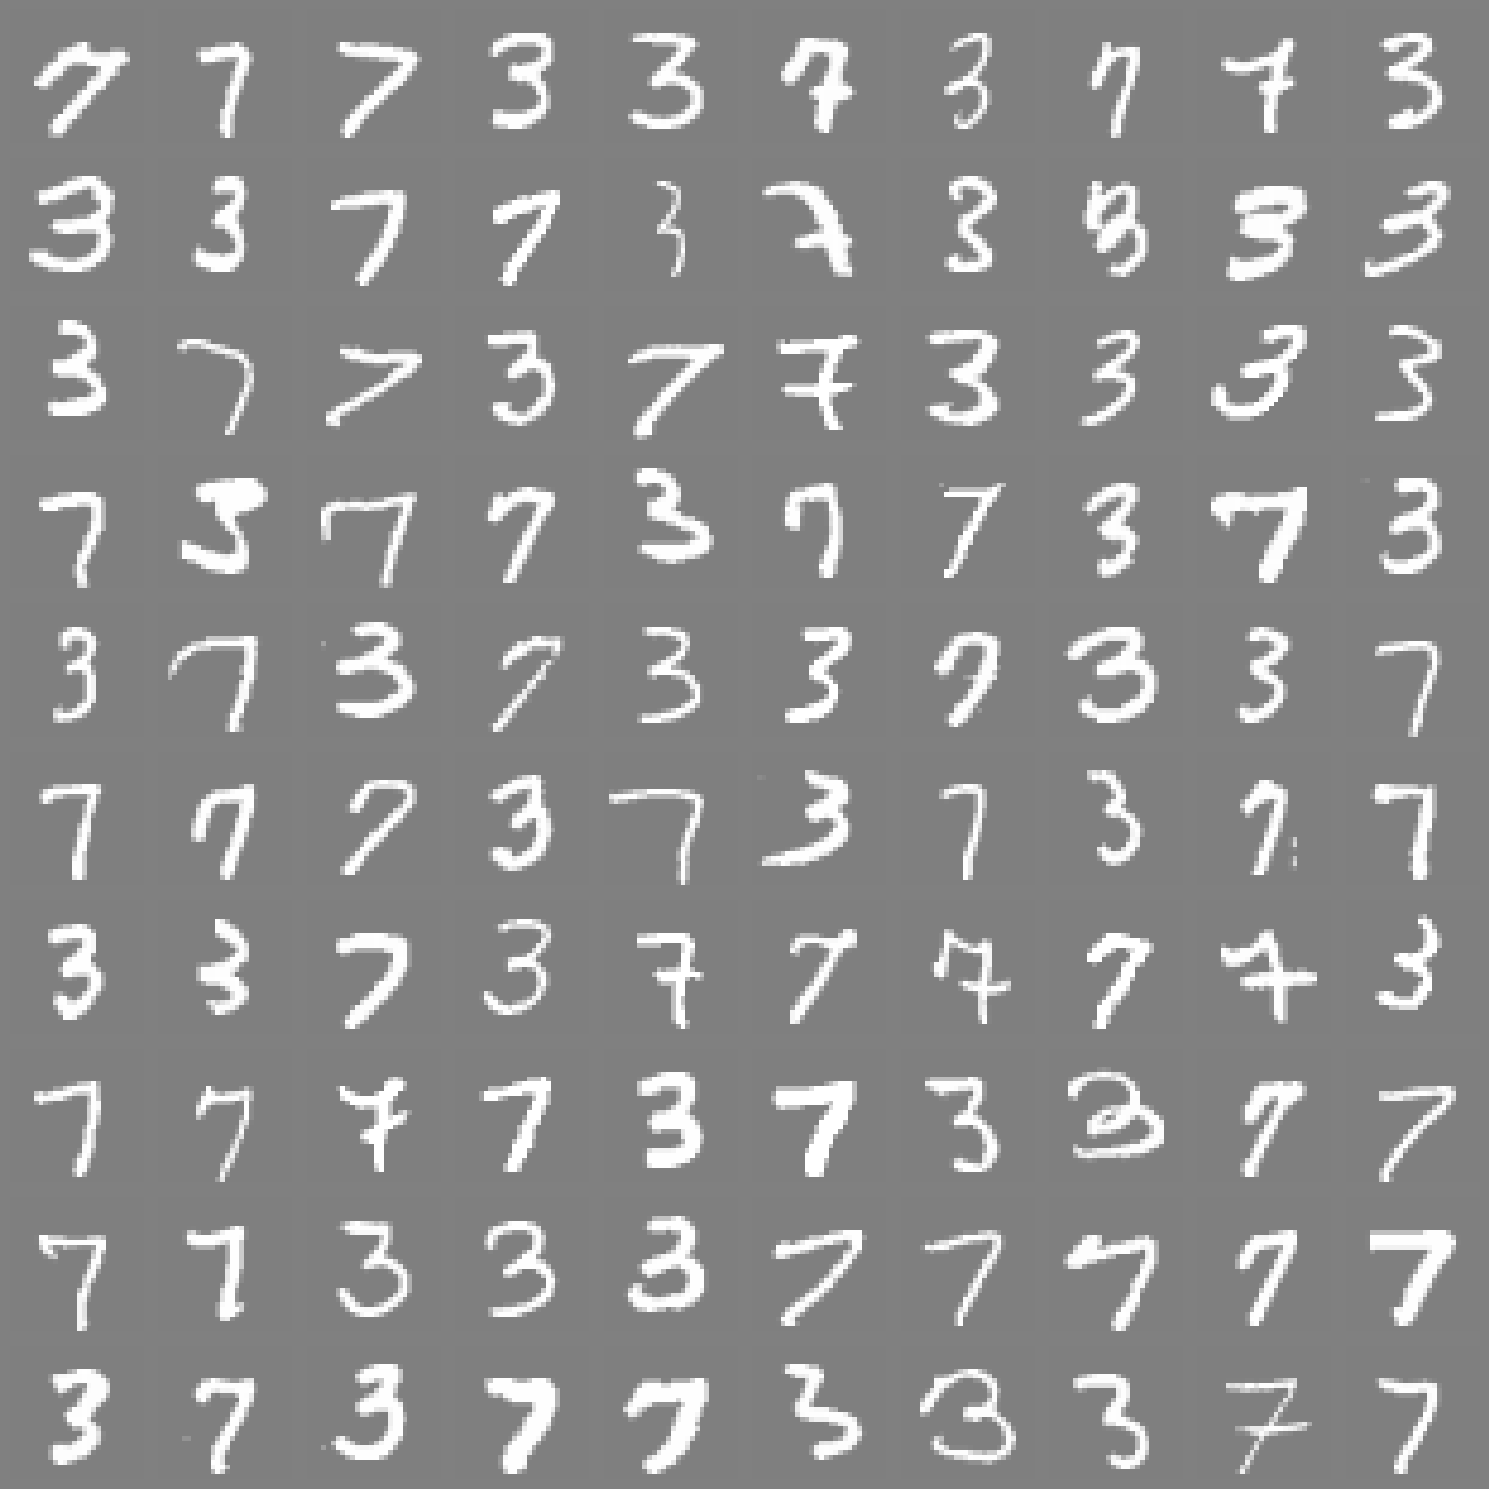

In [31]:
num_rows = 10
num_cols = 10
X_test_tensor2 = X_test_tensor.detach().numpy()
visualize_data(num_rows,num_cols,X_test_tensor2) # to visualize the test data


### Evaluation of the model on the unaltered test set


In [32]:
eval_test(X_test_tensor,y_test_tensor,model)

Accuracy: 96.05%
Mean Confidence for All Examples: 0.9604
Mean Confidence for Incorrect Predictions: 0.7528


### Creation of the adversarial test set


In [33]:
eps = 0.25
X_test_tensor_adv = create_adv_test(model_trained,X_test_tensor,y_test_tensor,eps,criterion) # to create the adversarial test set

/home/spi-2019/Téléchargements/Tpworkspace/MLA_proj/RBF/adv_attack.py:36: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  alt_im_norm =torch.tensor(alt_im, dtype=torch.float32)


### Visualization of the altered test set


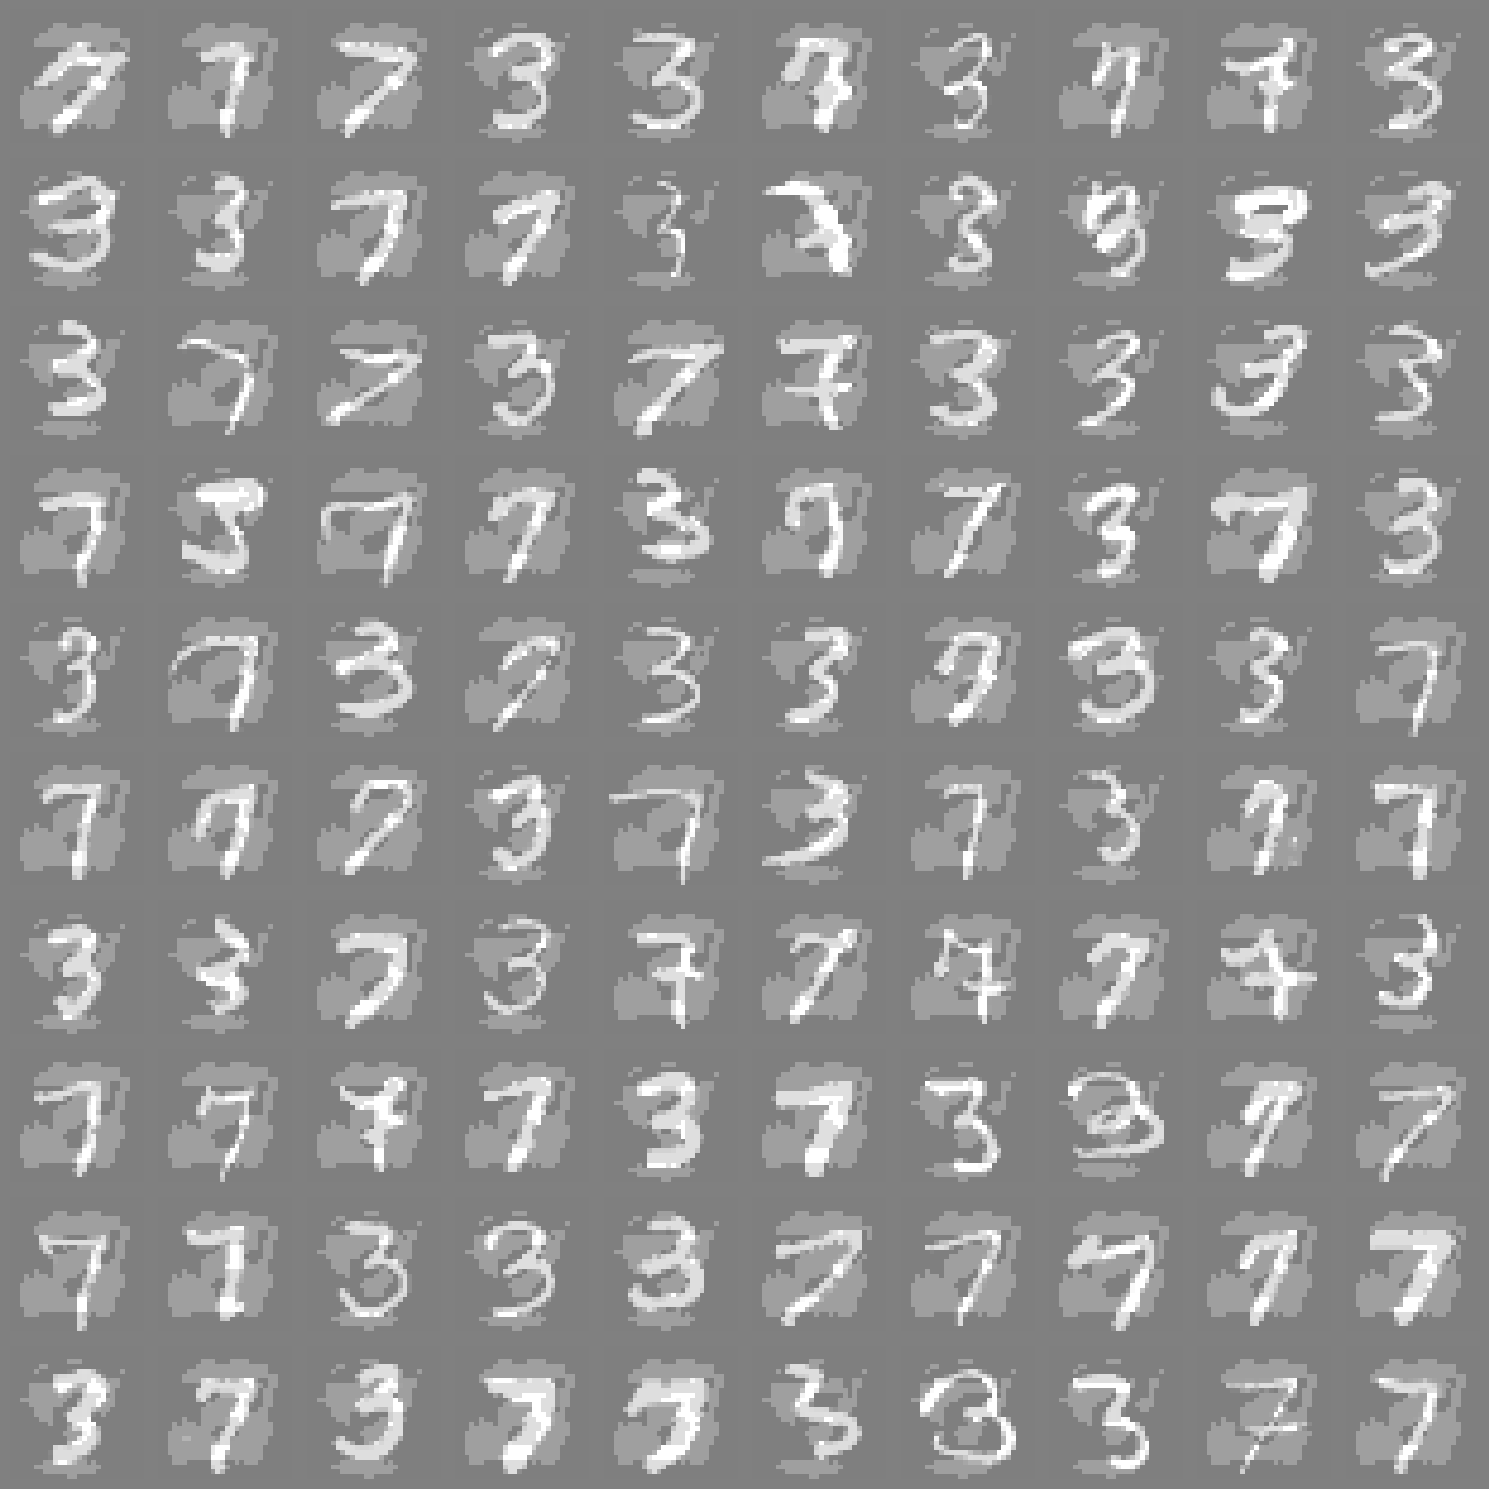

In [34]:
X_test_tensor_adv2 = X_test_tensor_adv.detach().numpy()
visualize_data(num_rows,num_cols,X_test_tensor_adv2) # to visualize the adversarial test set

### Evaluation of the model on the altered test set


In [35]:
eval_test(X_test_tensor_adv,y_test_tensor,model)

Accuracy: 31.10%
Mean Confidence for All Examples: 0.8520
Mean Confidence for Incorrect Predictions: 0.8612


# 4/ Work on generalization

## 4.1 Shallow Maxout Network with Softmax

In [30]:
from generalization.utils_gen import extract_from_mnist, visualize_data
from generalization.train_gen import prep_data,create_model,training_loop,eval_test,eval_train, plot_losses,visualize_weights_and_signs,test_eps,plot_eps
from generalization.adv_attack_gen import adv_attack,create_adv_test
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from generalization.ADV_generalize import adv_attack, test_Maxout, training_loop_Maxout, eval_test_Maxout

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from torch.autograd import Variable

from sklearn.model_selection import train_test_split
from matplotlib.colors import LinearSegmentedColormap
from sklearn.preprocessing import LabelEncoder
from generalization.maxout_gen import MaxoutNetworkWithSoftmax

### Data extraction

In [31]:
data = extract_from_mnist()

Filtered dataset shape: (20000, 785)
Labels: 0        8
1        4
2        8
3        7
4        7
        ..
19995    8
19996    3
19997    1
19998    7
19999    6
Name: target, Length: 20000, dtype: int64


### Data prep and model creation

In [32]:
X_train_tensor,y_train_tensor,X_test_tensor,y_test_tensor,num_classes = prep_data(data)

Unique classes in target labels: 10


In [33]:
List_arg_not4 = [i for i in range(y_test_tensor.shape[0]) if y_test_tensor[i] != 4]

X_test_tensor = torch.tensor(np.delete(X_test_tensor, List_arg_not4, axis=0), dtype=torch.float32)
y_test_tensor = torch.tensor(np.delete(y_test_tensor, List_arg_not4), dtype=torch.long)
X_test_tensor_tri = X_test_tensor[0,:]
y_test_tensor_tri = torch.tensor([4], dtype=torch.long)

/tmp/ipykernel_20163/4265313002.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test_tensor = torch.tensor(np.delete(X_test_tensor, List_arg_not4, axis=0), dtype=torch.float32)
/tmp/ipykernel_20163/4265313002.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_test_tensor = torch.tensor(np.delete(y_test_tensor, List_arg_not4), dtype=torch.long)


In [34]:
# Hyperparameters
batch_size = 128
n_epochs = 100
lr = 0.001

In [35]:
# Create TensorDatasets for training and testing sets
training_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# Create DataLoaders for training and testing sets
training_dataloader = DataLoader(training_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)


In [36]:
model, criterion, optimizer = create_model(MaxoutNetworkWithSoftmax)

### Training loop

In [37]:
training_loss ,model_trained = training_loop_Maxout(optimizer, model, criterion, X_train_tensor, y_train_tensor,num_epochs=n_epochs,batch_size=batch_size)

Epoch [1/100], Loss: 2.0583
Epoch [2/100], Loss: 1.8662
Epoch [3/100], Loss: 1.6917
Epoch [4/100], Loss: 1.5113
Epoch [5/100], Loss: 1.4048
Epoch [6/100], Loss: 1.2400
Epoch [7/100], Loss: 1.1998
Epoch [8/100], Loss: 1.0712
Epoch [9/100], Loss: 0.9636
Epoch [10/100], Loss: 0.8974
Epoch [11/100], Loss: 0.8786
Epoch [12/100], Loss: 0.7865
Epoch [13/100], Loss: 0.6918
Epoch [14/100], Loss: 0.7252
Epoch [15/100], Loss: 0.7003
Epoch [16/100], Loss: 0.6462
Epoch [17/100], Loss: 0.6369
Epoch [18/100], Loss: 0.5594
Epoch [19/100], Loss: 0.6179
Epoch [20/100], Loss: 0.6574
Epoch [21/100], Loss: 0.5234
Epoch [22/100], Loss: 0.5878
Epoch [23/100], Loss: 0.5405
Epoch [24/100], Loss: 0.5099
Epoch [25/100], Loss: 0.5095
Epoch [26/100], Loss: 0.5244
Epoch [27/100], Loss: 0.5151
Epoch [28/100], Loss: 0.5198
Epoch [29/100], Loss: 0.5106
Epoch [30/100], Loss: 0.5730
Epoch [31/100], Loss: 0.5331
Epoch [32/100], Loss: 0.5979
Epoch [33/100], Loss: 0.4899
Epoch [34/100], Loss: 0.4941
Epoch [35/100], Loss: 0

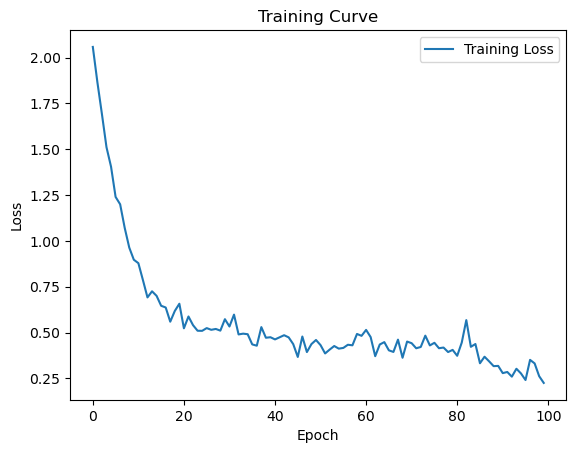

In [38]:
plot_losses(training_loss)

In [39]:
eval_test_Maxout(X_test_tensor,y_test_tensor,model)

Accuracy: 95.32%
Mean Confidence for All Examples: 0.7060
Mean Confidence for Incorrect Predictions: 0.6754


### Creation of the adversarial test set and test evaluation of the Neural Network on the different adversarial examples

In [40]:
input_size = 784
num_classes = 10
device = torch.device("cpu")

# Define the model
model = MaxoutNetworkWithSoftmax(input_size, num_classes)

model = model.to(device)

# Run test for each epsilon

args, eps = test_eps(test_Maxout,model, device, test_dataloader)

arg softmax : tensor([[0.0000, 0.1893, 0.7952,  ..., 0.0000, 0.0000, 0.1543],
        [0.0000, 0.1274, 0.8295,  ..., 0.0227, 0.0000, 0.1095],
        [0.0000, 0.1892, 0.7718,  ..., 0.0062, 0.1415, 0.0000],
        ...,
        [0.0448, 0.1773, 0.7923,  ..., 0.0000, 0.0323, 0.0000],
        [0.0000, 0.2146, 0.7770,  ..., 0.0000, 0.1951, 0.0000],
        [0.0000, 0.0436, 0.7293,  ..., 0.0000, 0.1125, 0.0116]],
       grad_fn=<ReluBackward0>)
output : torch.Size([128, 10])
arg softmax : tensor([[0.0000, 0.1204, 0.8757,  ..., 0.0000, 0.1148, 0.2687],
        [0.0000, 0.1408, 0.7906,  ..., 0.0793, 0.1533, 0.1039],
        [0.0000, 0.1628, 0.7911,  ..., 0.1177, 0.1468, 0.1020],
        ...,
        [0.0000, 0.2031, 0.8079,  ..., 0.0000, 0.1452, 0.0000],
        [0.0766, 0.1494, 0.7872,  ..., 0.0000, 0.0000, 0.1004],
        [0.0000, 0.2357, 0.7669,  ..., 0.0000, 0.1108, 0.0691]],
       grad_fn=<ReluBackward0>)
output : torch.Size([128, 10])
arg softmax : tensor([[0.0000, 0.2044, 0.8063,  ..

/home/spi-2019/Téléchargements/Tpworkspace/MLA_proj/generalization/train_gen.py:125: RuntimeWarning: invalid value encountered in log
  args[i] = np.log(args[i]) - np.log(np.sum(np.exp(args[i]), axis=1, keepdims=True))


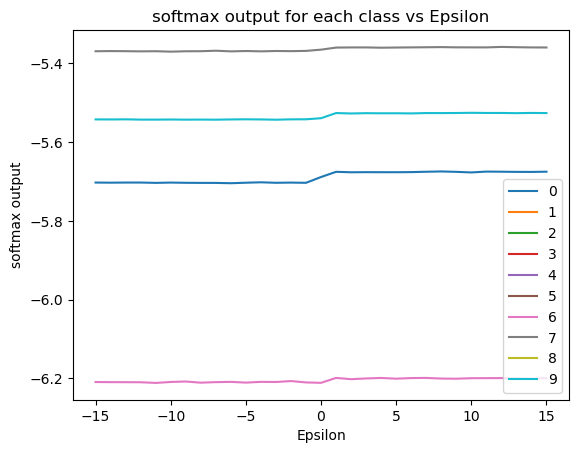

In [41]:
plot_eps(args,eps)

## 4.2.1 Deep maxout network


In [42]:
from generalization.utils_gen import extract_from_mnist, visualize_data
from generalization.train_gen import prep_data,create_model,training_loop,eval_test,eval_train, plot_losses,visualize_weights_and_signs,create_model_2,create_model_3,create_model_4
from generalization.adv_attack_gen import adv_attack,create_adv_test
from generalization.RBF_architecture import ShallowRBF
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import pandas as pd
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from matplotlib.colors import LinearSegmentedColormap
from sklearn.preprocessing import LabelEncoder
#DEFINE CUSTOM MAXOUT MODELS
from generalization.needed_archi import MaxoutLayer, DeepMaxoutNetwork, ShallowSoftmaxNetBN



### Data Extraction


In [43]:
data2 = extract_from_mnist()

Filtered dataset shape: (20000, 785)
Labels: 0        8
1        4
2        8
3        7
4        7
        ..
19995    8
19996    3
19997    1
19998    7
19999    6
Name: target, Length: 20000, dtype: int64


### Data preparation and model creation


In [44]:
X_train_tensor,y_train_tensor,X_test_tensor,y_test_tensor,num_classes = prep_data(data2)

Unique classes in target labels: 10


In [45]:
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, 64, shuffle=True)

In [46]:
deep_maxout_model,criterion,optimizer, num_epochs, Batch_size = create_model_2(DeepMaxoutNetwork,X_train_tensor)
 


### Training loop

In [47]:
training_loss ,model_trained = training_loop(optimizer, deep_maxout_model , criterion, X_train_tensor, y_train_tensor,num_epochs=num_epochs,batch_size=Batch_size)

Epoch [1/100], Loss: 0.6112
Epoch [2/100], Loss: 0.3406
Epoch [3/100], Loss: 0.2747
Epoch [4/100], Loss: 0.2692
Epoch [5/100], Loss: 0.4482
Epoch [6/100], Loss: 0.5372
Epoch [7/100], Loss: 0.3763
Epoch [8/100], Loss: 0.3198
Epoch [9/100], Loss: 0.3542
Epoch [10/100], Loss: 0.3123
Epoch [11/100], Loss: 0.1908
Epoch [12/100], Loss: 0.2916
Epoch [13/100], Loss: 0.2926
Epoch [14/100], Loss: 0.3677
Epoch [15/100], Loss: 0.2587
Epoch [16/100], Loss: 0.2275
Epoch [17/100], Loss: 0.1860
Epoch [18/100], Loss: 0.2208
Epoch [19/100], Loss: 0.2423
Epoch [20/100], Loss: 0.1954
Epoch [21/100], Loss: 0.2119
Epoch [22/100], Loss: 0.2551
Epoch [23/100], Loss: 0.1637
Epoch [24/100], Loss: 0.2902
Epoch [25/100], Loss: 0.2056
Epoch [26/100], Loss: 0.2957
Epoch [27/100], Loss: 0.2552
Epoch [28/100], Loss: 0.2824
Epoch [29/100], Loss: 0.2589
Epoch [30/100], Loss: 0.2547
Epoch [31/100], Loss: 0.3302
Epoch [32/100], Loss: 0.4049
Epoch [33/100], Loss: 0.2160
Epoch [34/100], Loss: 0.2452
Epoch [35/100], Loss: 0

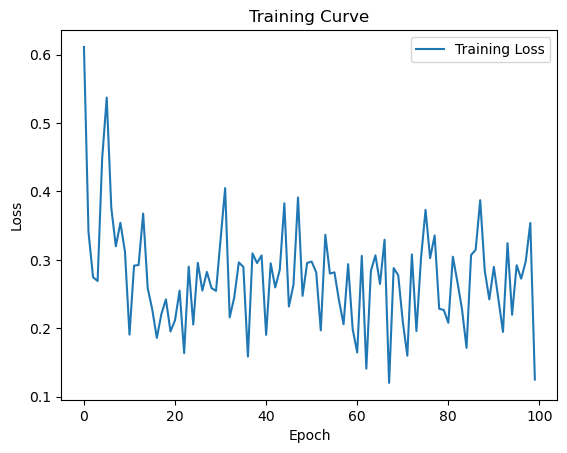

In [48]:
plot_losses(training_loss) # to plot the training loss


## 4.2.2 Deep Maxout Vs Adversarial



Test set for original images


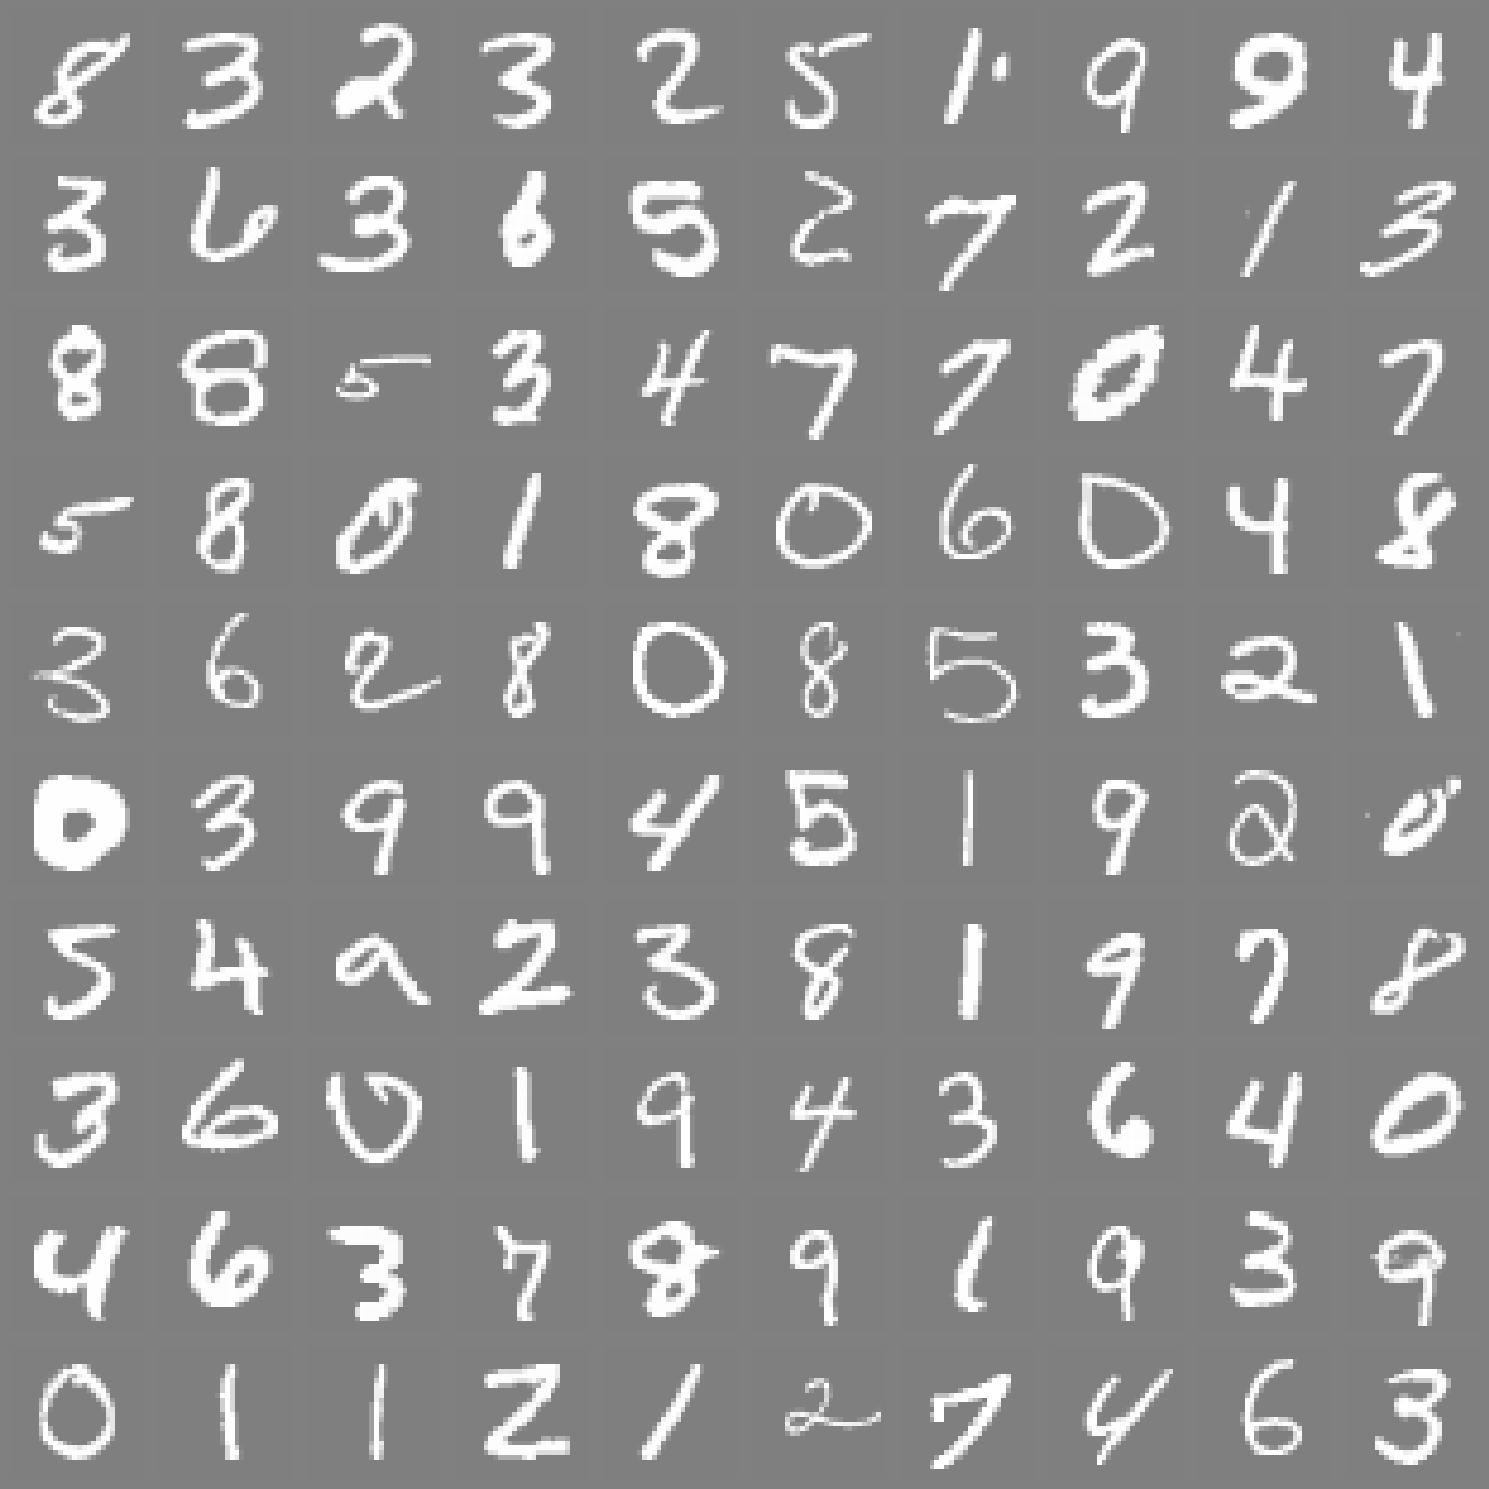

In [49]:
X_test_tensor2 = X_test_tensor.detach().numpy()
visualize_data(num_rows,num_cols,X_test_tensor2) # to visualize the test data


Evaluation of the model on the unaltered test set


In [50]:
wrong_preds_maxout, correct_preds_maxout,all_preds_maxout  =eval_test(X_test_tensor,y_test_tensor,deep_maxout_model) # to evaluate the model on the test set

Accuracy: 92.38%
Mean Confidence for All Examples: 0.8768
Mean Confidence for Incorrect Predictions: 0.6078



Creation of the adversarial test set


In [52]:
eps = 0.25
X_test_tensor_adv = create_adv_test(model_trained,X_test_tensor,y_test_tensor,eps,criterion) # to create the adversarial test set


Visualization of the altered test set

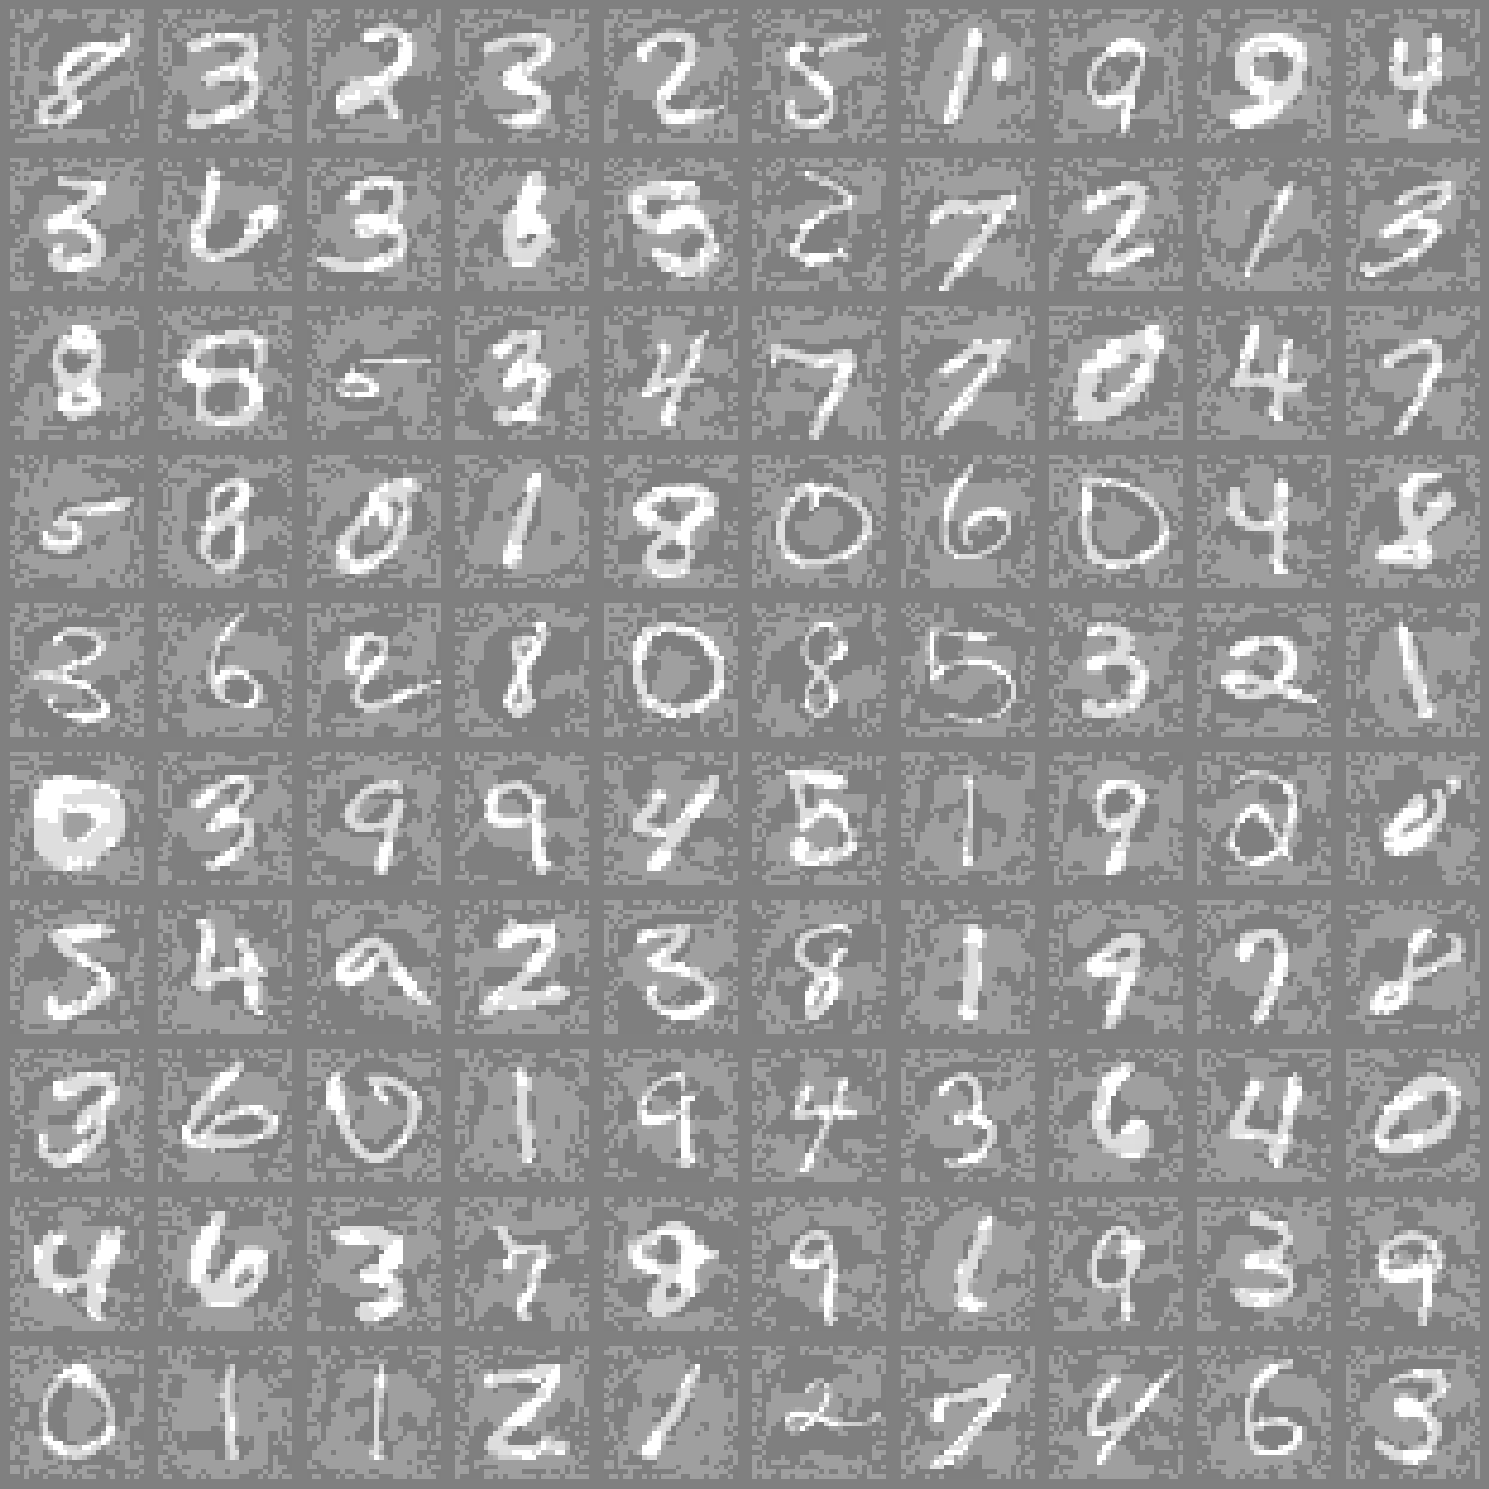

In [53]:
X_test_tensor_adv2 = X_test_tensor_adv.detach().numpy()
visualize_data(num_rows,num_cols,X_test_tensor_adv2) # to visualize the adversarial test set


Evaluation of the model on the altered test set


In [54]:
wrong_preds_maxout_adv, correct_preds_maxout_adv,all_preds_maxout_adv   = eval_test(X_test_tensor_adv,y_test_tensor,deep_maxout_model) # to evaluate the model on the adversarial test set

Accuracy: 1.20%
Mean Confidence for All Examples: 0.7571
Mean Confidence for Incorrect Predictions: 0.7593


## 4.2.3 Shallow RBF


In [55]:
batch_images,batch_labels= next(iter(train_loader))
centers = batch_images

Model creation

In [56]:
RBF_model,criterion,optimizer, num_epochs, Batch_size = create_model_3(ShallowRBF,X_train_tensor,centers)

Training loop

In [57]:
training_loss_RBF ,model_trained_RBF = training_loop(optimizer, RBF_model , criterion, X_train_tensor, y_train_tensor,num_epochs=num_epochs,batch_size=Batch_size)

Epoch [1/100], Loss: 1.7568
Epoch [2/100], Loss: 1.4835
Epoch [3/100], Loss: 1.3909
Epoch [4/100], Loss: 1.2995
Epoch [5/100], Loss: 1.4234
Epoch [6/100], Loss: 1.2705
Epoch [7/100], Loss: 1.3847
Epoch [8/100], Loss: 1.2455
Epoch [9/100], Loss: 1.1559
Epoch [10/100], Loss: 1.3253
Epoch [11/100], Loss: 1.3628
Epoch [12/100], Loss: 1.3942
Epoch [13/100], Loss: 1.1308
Epoch [14/100], Loss: 1.2323
Epoch [15/100], Loss: 1.1449
Epoch [16/100], Loss: 1.2063
Epoch [17/100], Loss: 1.1360
Epoch [18/100], Loss: 1.2786
Epoch [19/100], Loss: 1.2169
Epoch [20/100], Loss: 1.0416
Epoch [21/100], Loss: 1.1880
Epoch [22/100], Loss: 1.0013
Epoch [23/100], Loss: 1.0428
Epoch [24/100], Loss: 1.0374
Epoch [25/100], Loss: 0.9982
Epoch [26/100], Loss: 1.1354
Epoch [27/100], Loss: 1.0617
Epoch [28/100], Loss: 0.9728
Epoch [29/100], Loss: 1.0889
Epoch [30/100], Loss: 1.2282
Epoch [31/100], Loss: 0.8307
Epoch [32/100], Loss: 0.8918
Epoch [33/100], Loss: 0.9721
Epoch [34/100], Loss: 0.8008
Epoch [35/100], Loss: 0

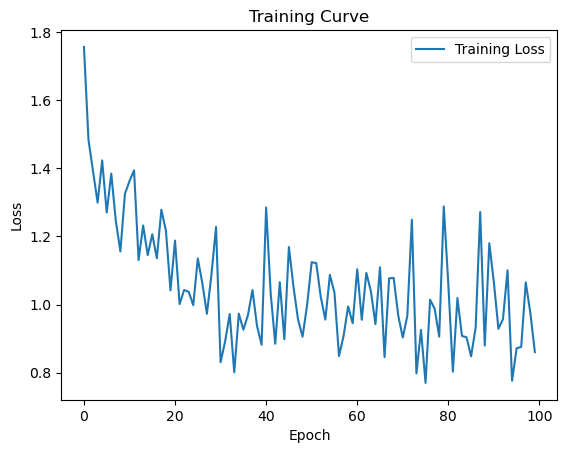

In [59]:
plot_losses(training_loss_RBF) # to plot the training loss

In [60]:
eval_train(X_train_tensor,y_train_tensor,model_trained_RBF) # to evaluate the model on the training set

Training Accuracy: 67.77%



Evaluation of the model on the unaltered test set


In [61]:
wrong_preds_RBF, correct_preds_RBF,all_preds_RBF  =eval_test(X_test_tensor,y_test_tensor,RBF_model) # to evaluate the model on the test set

Accuracy: 66.60%
Mean Confidence for All Examples: 0.6082
Mean Confidence for Incorrect Predictions: 0.4846



Evaluation of the model on the altered test set generated by the deep maxout


In [62]:

wrong_preds_RBF_adv, correct_preds_RBF_adv,all_preds_RBF_adv   =eval_test(X_test_tensor_adv,y_test_tensor,RBF_model) # to evaluate the RBF model on the adversarial test set generated by the maxout model

Accuracy: 6.58%
Mean Confidence for All Examples: 0.5430
Mean Confidence for Incorrect Predictions: 0.5409


## 4.2.3 Shallow Softmax

Model creation

In [63]:
ShallowSoftmax_model,criterion,optimizer, num_epochs, Batch_size = create_model_4(ShallowSoftmaxNetBN,X_train_tensor)

Training loop

In [64]:
training_loss_shallowsoft ,model_trained_shallowsoft = training_loop(optimizer, ShallowSoftmax_model , criterion, X_train_tensor, y_train_tensor,num_epochs=num_epochs,batch_size=Batch_size)

Epoch [1/100], Loss: 1.6864
Epoch [2/100], Loss: 1.6788
Epoch [3/100], Loss: 1.5884
Epoch [4/100], Loss: 1.5950
Epoch [5/100], Loss: 1.5927
Epoch [6/100], Loss: 1.5658
Epoch [7/100], Loss: 1.5900
Epoch [8/100], Loss: 1.6104
Epoch [9/100], Loss: 1.5417
Epoch [10/100], Loss: 1.5693
Epoch [11/100], Loss: 1.5418
Epoch [12/100], Loss: 1.5378
Epoch [13/100], Loss: 1.5532
Epoch [14/100], Loss: 1.5411
Epoch [15/100], Loss: 1.5495
Epoch [16/100], Loss: 1.5458
Epoch [17/100], Loss: 1.5506
Epoch [18/100], Loss: 1.5830
Epoch [19/100], Loss: 1.5292
Epoch [20/100], Loss: 1.5496
Epoch [21/100], Loss: 1.5541
Epoch [22/100], Loss: 1.5907
Epoch [23/100], Loss: 1.5463
Epoch [24/100], Loss: 1.5178
Epoch [25/100], Loss: 1.5487
Epoch [26/100], Loss: 1.5882
Epoch [27/100], Loss: 1.5702
Epoch [28/100], Loss: 1.5610
Epoch [29/100], Loss: 1.5349
Epoch [30/100], Loss: 1.6036
Epoch [31/100], Loss: 1.6026
Epoch [32/100], Loss: 1.5464
Epoch [33/100], Loss: 1.5431
Epoch [34/100], Loss: 1.5398
Epoch [35/100], Loss: 1

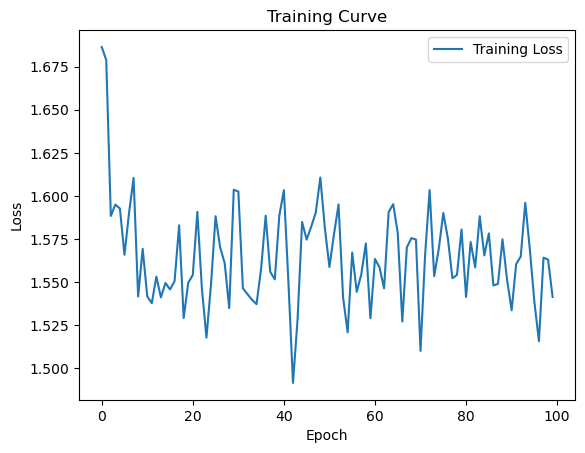

In [66]:
plot_losses(training_loss_shallowsoft) # to plot the training loss

In [67]:
eval_train(X_train_tensor,y_train_tensor,model_trained_shallowsoft) # to evaluate the model on the training set

Training Accuracy: 93.47%



Evaluation of the model on the unaltered test set


In [68]:
wrong_preds_shallowsoft, correct_preds_shallowsoft,all_preds_shallowsoft  = eval_test(X_test_tensor,y_test_tensor,model_trained_shallowsoft) # to evaluate the model on the test set

Accuracy: 91.45%
Mean Confidence for All Examples: 0.2233
Mean Confidence for Incorrect Predictions: 0.1896



Evaluation of the model on the altered test set generated by the deep maxout


In [69]:
wrong_preds_shallowsoft_adv, correct_preds_shallowsoft_adv, all_preds_shallowsoft_adv  =eval_test(X_test_tensor_adv,y_test_tensor,model_trained_shallowsoft) # to evaluate the RBF model on the adversarial test set generated by the maxout model

Accuracy: 4.30%
Mean Confidence for All Examples: 0.2063
Mean Confidence for Incorrect Predictions: 0.2072



Calculation of the similar prediction's percentages between the different neural networks implemented


In [70]:
# Count the total number of adversarial examples where both Maxout networks and the RBF network made wrong predictions
same_wrong_preds = sum(wrong_preds_maxout_adv[i] == wrong_preds_RBF_adv[i] for i in range(min(len(wrong_preds_maxout_adv), len(wrong_preds_RBF_adv))))

# Count the total number of adversarial examples
total_examples = min(len(wrong_preds_maxout_adv), len(wrong_preds_RBF_adv))

# Calculate the percentage
percentage_same_wrong_preds = (same_wrong_preds / total_examples) * 100

print("On missclassified examples : Percentage of how many times the shallow RBF predicts the maxouts class :")
print(percentage_same_wrong_preds)


On missclassified examples : Percentage of how many times the shallow RBF predicts the maxouts class :
9.339042012309339


In [71]:
# Count the total number of adversarial examples where both Maxout networks and the RBF network made wrong predictions
same_wrong_preds2 = sum(wrong_preds_maxout_adv[i] == wrong_preds_shallowsoft_adv[i] for i in range(min(len(wrong_preds_maxout_adv), len(wrong_preds_shallowsoft_adv))))

# Count the total number of adversarial examples
total_examples2 = min(len(wrong_preds_maxout_adv), len(wrong_preds_shallowsoft_adv))

# Calculate the percentage
percentage_same_wrong_preds2 = (same_wrong_preds2 / total_examples2) * 100

print("On missclassified examples : Percentage of how many times the shallow softmax predicts the maxouts class :")
print(percentage_same_wrong_preds2)

On missclassified examples : Percentage of how many times the shallow softmax predicts the maxouts class :
17.058516196447233


In [72]:
# Count the total number of adversarial examples where both Maxout networks and the RBF network made wrong predictions
same_all_preds_mrbf = sum(all_preds_maxout_adv[i] == all_preds_RBF_adv[i] for i in range(min(len(wrong_preds_maxout_adv), len(wrong_preds_RBF_adv))))

# Count the total number of adversarial examples
total_ex_all_mrbf = min(len(all_preds_maxout_adv), len(all_preds_RBF_adv))

# Calculate the percentage
percentage_same_all_preds_mrbf = (same_all_preds_mrbf / total_ex_all_mrbf) * 100

print("Percentage of how many times the RBF predicts the maxouts class :")
print(percentage_same_all_preds_mrbf)


Percentage of how many times the RBF predicts the maxouts class :
24.975


In [73]:
# Count the total number of adversarial examples where both Maxout networks and the RBF network made wrong predictions
same_all_preds_SFrbf = sum(all_preds_RBF_adv[i] == all_preds_shallowsoft_adv[i] for i in range(min(len(wrong_preds_RBF_adv), len(all_preds_shallowsoft_adv))))

# Count the total number of adversarial examples
total_ex_all_SFrbf = min(len(all_preds_RBF_adv), len(all_preds_shallowsoft_adv))

# Calculate the percentage
percentage_same_all_preds_SFrbf = (same_all_preds_SFrbf / total_ex_all_SFrbf) * 100

print("Percentage of how many times the RBF predicts the softmaxs class :")
print(percentage_same_all_preds_SFrbf)


Percentage of how many times the RBF predicts the softmaxs class :
26.275
